<a href="https://colab.research.google.com/github/SakshamWase/Projects_developed/blob/main/Analyzing_Naming_Trends_SW.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Problem Statement:
The dataset is in zipped format. We have to extract the dataset in the program,
visualize the number of male and female babies born in a particular year, and
find out popular baby names.

In [1]:
%pylab inline
import pandas as pd
from zipfile import ZipFile
import io
import matplotlib.pyplot as plt
import plotly.express as px

Populating the interactive namespace from numpy and matplotlib


In [13]:
names1880 = pd.read_csv('/content/yob1880.txt',names=['name','sex','births'])

In [18]:
names1880.head()

,name,sex,births
0,Mary,F,7065
1,Anna,F,2604
2,Emma,F,2003
3,Elizabeth,F,1939
4,Minnie,F,1746


In [19]:
names1880.groupby('sex').births.sum()

sex
F     90994
M    110490
Name: births, dtype: int64

In [34]:
years = range(1880,2023)
parts = []
columns = ['name','sex','births']
for year in years:
    path = '/content/yob%d.txt' % year
    frame = pd.read_csv(path, names = columns)

    frame['year'] = year
    parts.append(frame)

In [ ]:
parts

In [36]:
names = pd.concat(parts, ignore_index = True)
names

,name,sex,births,year
0,Mary,F,7065,1880
1,Anna,F,2604,1880
2,Emma,F,2003,1880
3,Elizabeth,F,1939,1880
4,Minnie,F,1746,1880
...,...,...,...,...
2085153,Zuberi,M,5,2022
2085154,Zydn,M,5,2022
2085155,Zylon,M,5,2022
2085156,Zymeer,M,5,2022


In [37]:
names.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2085158 entries, 0 to 2085157
Data columns (total 4 columns):
 #   Column  Dtype 
---  ------  ----- 
 0   name    object
 1   sex     object
 2   births  int64 
 3   year    int64 
dtypes: int64(2), object(2)
memory usage: 63.6+ MB


In [39]:
TotalBirthsinayear = names.pivot_table('births', index = 'year', columns = 'sex', aggfunc = sum)
TotalBirthsinayear

sex,F,M
year,,
1880,90994,110490
1881,91953,100737
1882,107847,113686
1883,112320,104625
1884,129019,114442
...,...,...
2018,1698373,1813377
2019,1675139,1790682
2020,1612393,1721588


<Axes: title={'center': 'Total birth of Male and Female each year'}, xlabel='year'>

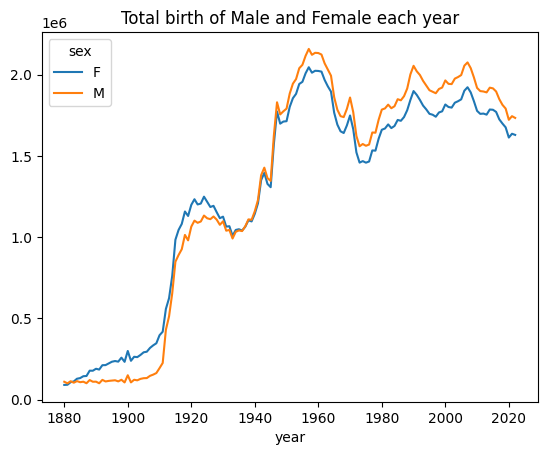

In [41]:
TotalBirthsinayear.plot(title='Total birth of Male and Female each year')

In [46]:
#Checking popular names by year and Sex
def check_popular_name(group):
      group['popular_name']= group.births/group.births.sum()
      return(group)

names=names.groupby(['year','sex']).apply(check_popular_name)
names

<ipython-input-46-f3a3005e76a5>:6: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  names=names.groupby(['year','sex']).apply(check_popular_name)


,name,sex,births,year,popular_name
0,Mary,F,7065,1880,0.077642
1,Anna,F,2604,1880,0.028617
2,Emma,F,2003,1880,0.022012
3,Elizabeth,F,1939,1880,0.021309
4,Minnie,F,1746,1880,0.019188
...,...,...,...,...,...
2085153,Zuberi,M,5,2022,0.000003
2085154,Zydn,M,5,2022,0.000003
2085155,Zylon,M,5,2022,0.000003
2085156,Zymeer,M,5,2022,0.000003


In [50]:
def get_top_100(group):
      return group.sort_values(by = 'births', ascending = False)[:100]

grouped = names.groupby(['year','sex'])
top_100 = grouped.apply(get_top_100)
top_100

name sex  births  year  popular_name
year sex                                                   
1880 F   0             Mary   F    7065  1880      0.077642
         1             Anna   F    2604  1880      0.028617
         2             Emma   F    2003  1880      0.022012
         3        Elizabeth   F    1939  1880      0.021309
         4           Minnie   F    1746  1880      0.019188
...                     ...  ..     ...   ...           ...
2022 M   2070998      Rowan   M    3742  2022      0.002159
         2070999       Adam   M    3625  2022      0.002092
         2071000   Nicholas   M    3623  2022      0.002090
         2071001       Theo   M    3614  2022      0.002085
         2071002     Xavier   M    3580  2022      0.002066

[28600 rows x 5 columns]

In [54]:
top_100.reset_index(inplace = True, drop = True)
top_100

,name,sex,births,year,popular_name
0,Mary,F,7065,1880,0.077642
1,Anna,F,2604,1880,0.028617
2,Emma,F,2003,1880,0.022012
3,Elizabeth,F,1939,1880,0.021309
4,Minnie,F,1746,1880,0.019188
...,...,...,...,...,...
28595,Rowan,M,3742,2022,0.002159
28596,Adam,M,3625,2022,0.002092
28597,Nicholas,M,3623,2022,0.002090
28598,Theo,M,3614,2022,0.002085


In [61]:
Baby_boys= top_100[top_100.sex =='M']
Baby_boys.head(100)

,name,sex,births,year,popular_name
100,John,M,9655,1880,0.087383
101,William,M,9532,1880,0.086270
102,James,M,5927,1880,0.053643
103,Charles,M,5348,1880,0.048403
104,George,M,5126,1880,0.046393
...,...,...,...,...,...
195,Sidney,M,142,1880,0.001285
196,Bernard,M,140,1880,0.001267
197,Dan,M,140,1880,0.001267
198,Jerry,M,136,1880,0.001231


In [60]:
Baby_girls= top_100[top_100.sex =='F']
Baby_girls.head(100)

,name,sex,births,year,popular_name
0,Mary,F,7065,1880,0.077642
1,Anna,F,2604,1880,0.028617
2,Emma,F,2003,1880,0.022012
3,Elizabeth,F,1939,1880,0.021309
4,Minnie,F,1746,1880,0.019188
...,...,...,...,...,...
95,Amelia,F,221,1880,0.002429
96,Hannah,F,221,1880,0.002429
97,Jane,F,215,1880,0.002363
98,Virginia,F,213,1880,0.002341


In [59]:
total_births = top_100.pivot_table('births',index = 'year', columns = 'name', aggfunc = sum)
total_births

name,Aaliyah,Aaron,Abigail,Ada,Adam,Addie,Addison,Adeline,Adrian,Agnes,...,Willow,Wilma,Woodrow,Wyatt,Xavier,Yolanda,Yvonne,Zachary,Zoe,Zoey
year,,,,,,,,,,,,,,,,,,,,,
1880,NaN,NaN,NaN,652.0,NaN,274.0,NaN,NaN,NaN,473.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1881,NaN,NaN,NaN,628.0,NaN,287.0,NaN,NaN,NaN,424.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1882,NaN,NaN,NaN,689.0,NaN,341.0,NaN,NaN,NaN,565.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1883,NaN,NaN,NaN,778.0,NaN,362.0,NaN,NaN,NaN,623.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1884,NaN,NaN,NaN,854.0,NaN,356.0,NaN,NaN,NaN,703.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018,3836.0,5986.0,9864.0,NaN,4705.0,NaN,5226.0,3488.0,5813.0,NaN,...,3925.0,NaN,NaN,9174.0,4331.0,NaN,NaN,NaN,5121.0,5937.0
2019,3661.0,5534.0,9171.0,NaN,4183.0,NaN,4486.0,3073.0,5777.0,NaN,...,4596.0,NaN,NaN,8825.0,4182.0,NaN,NaN,NaN,5067.0,5676.0
2020,3572.0,5087.0,7891.0,NaN,3772.0,NaN,4489.0,2716.0,5303.0,NaN,...,4383.0,NaN,NaN,8199.0,3887.0,NaN,NaN,NaN,4791.0,5373.0


array([<Axes: xlabel='year'>, <Axes: xlabel='year'>,
       <Axes: xlabel='year'>, <Axes: xlabel='year'>,
       <Axes: xlabel='year'>, <Axes: xlabel='year'>], dtype=object)

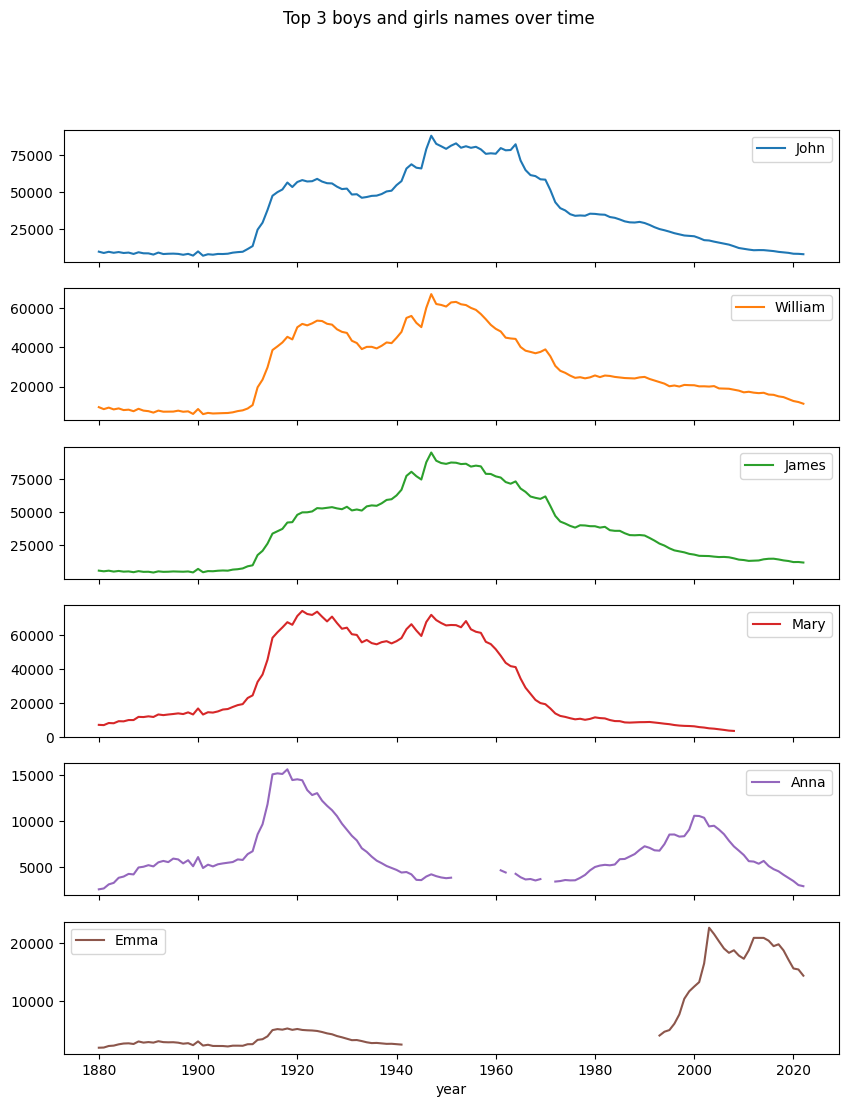

In [72]:
Few_childres_over_time = total_births[['John','William','James','Mary','Anna','Emma' ]]
Few_childres_over_time.plot(subplots = True, figsize = (10,12), title = 'Top 3 boys and girls names over time' )